# NLP Part 2

Let's import our standard modules: 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
%matplotlib inline

import warnings #I probably won't regret doing this
warnings.filterwarnings("ignore")

and read in our data: 

In [2]:
test = pd.read_csv("data/test_dataframe.csv")
train = pd.read_csv("data/train_dataframe.csv")
print(train.shape)
train.head()

(13651, 2587)


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_working,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,Reviewer_Score
0,220.0,9.1,20.0,902.0,21.0,1.0,275.0,51.494308,-0.175558,11.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
1,1190.0,7.5,5.0,5180.0,23.0,6.0,481.0,51.514879,-0.160650,4.0,...,0.0,0.0,0.0,0.0,0.0,0.425849,0.0,0.0,0.0,1.0
2,299.0,8.3,81.0,1361.0,27.0,4.0,672.0,51.521009,-0.123097,10.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,87.0,9.0,17.0,355.0,13.0,7.0,412.0,51.499749,-0.161524,6.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
4,317.0,7.6,14.0,1458.0,0.0,1.0,499.0,51.516114,-0.174952,3.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [3]:
print(test.shape)
test.head()

(3413, 2587)


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_working,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,Reviewer_Score
0,2288.0,8.1,24.0,9568.0,16.0,1.0,527.0,51.511099,-0.120867,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,61.0,9.0,0.0,263.0,21.0,1.0,527.0,51.522636,-0.160287,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,974.0,9.0,20.0,3040.0,20.0,12.0,485.0,51.500732,-0.016550,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,838.0,8.4,23.0,3274.0,29.0,5.0,415.0,51.495666,-0.145279,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,879.0,8.8,48.0,2768.0,51.0,1.0,385.0,51.508354,0.019886,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 1. Employ a linear classifier on this datase

Logistic Regression utilzes the sigmoid function (which involves a linear regression in the denominator). 

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

#Seperate into independent and dependent variables
X_train = train.iloc[:, 0:2586]
y_train = train['Reviewer_Score']

X_test = test.iloc[:, 0:2586]
y_test = test['Reviewer_Score']


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
#Instantiate the model
logreg = LogisticRegression(solver='lbfgs', verbose = 1)

#Train the model
logreg.fit(X_train_scaled, y_train)

#Score the model
print(f"The logisitc regression test score is: {round(logreg.score(X_test_scaled, y_test)*100,2)}%")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The logisitc regression test score is: 74.98%


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s finished


In [6]:
logreg_coefs = np.array(logreg.coef_)

coefs_size = logreg_coefs.shape[1]

sorted_coefs = np.sort(logreg_coefs) #sorting by largest to smallest. 

A logistic regression uses the sigmoid curve to make its decisions and provide a probability. An extreme negative value in the equatiopn would drastically reduce the chances a review woulld be classified as positive, and vice versa for positive reviews. reviews that are closest to 0 have negligable effect on the classification. 

In the next cell, I take the top and bottom 20 coefficients and stroe them in variables called `bad_reviews_coefficients` and `good_reviews_coefficients`

In [7]:
bad_reviews_coefficients = sorted_coefs[0, 0:19]

good_reviews_coefficients = sorted_coefs[0, coefs_size-20 : coefs_size]

In [8]:
logreg_coefs = logreg_coefs.reshape(coefs_size,)
good_review_indexs = []
bad_review_indexs = []

#Here, I obtain the indices of the good reviews 
for i in good_reviews_coefficients:
    index = 0
    for j in logreg_coefs:
        if i == j:
            good_review_indexs.append(index)
            index+=1
        else:
            index+=1

            
#Here, I obtain the indices of the bad reviews 
for i in bad_reviews_coefficients:
    index = 0
    for j in logreg_coefs:
        if i == j:
            bad_review_indexs.append(index)
            index+=1
        else:
            index+=1


In [9]:
train.iloc[0,good_review_indexs] #taking a look at the good review identifiers

p_outstanding                        0.000000
p_attention                          0.000000
p_beautiful                          0.000000
n_feet                               0.000000
p_smile                              0.000000
p_perfect                            0.000000
p_upgraded                           0.000000
p_fantastic                          0.000000
p_ironing                            0.000000
Hotel_Name_Corinthia Hotel London    0.000000
p_future                             0.000000
p_half                               0.000000
n_loved                              0.000000
p_professional                       0.000000
p_movies                             0.000000
p_excellent                          0.000000
p_amazing                            0.215429
p_kindly                             0.000000
p_truly                              0.000000
Average_Score                        9.100000
Name: 0, dtype: float64

In [10]:
train.iloc[0,bad_review_indexs] #taking a look at the bad review identifiers 

n_black                         0.000000
n_premier                       0.000000
n_joke                          0.000000
n_lamp                          0.000000
n_room                          0.150857
n_staff                         0.000000
n_peeling                       0.000000
n_dirty                         0.000000
n_rude                          0.000000
n_won                           0.000000
Hotel_Name_Thistle Hyde Park    0.000000
n_negative                      0.000000
p_wi                            0.000000
p_board                         0.000000
n_star                          0.000000
n_impression                    0.000000
n_smelly                        0.000000
n_bed                           0.000000
n_deluxe                        0.000000
Name: 0, dtype: float64

Now we can look at the effect of dimensionality reduction, and we can also take a look at the scores and runtime as well. 

In [11]:
from sklearn.decomposition import PCA

scores_logreg = []
timings = []
dimensions = range(coefs_size, 1, -150)

for i in dimensions:
    
    #Time Sandwhich
    start_time = time.time()
    
    pca = PCA(n_components = i)

    pca.fit(X_train)    
    
    #Instantiate the model
    logreg = LogisticRegression(solver='lbfgs', max_iter = 50)

    #Train the model
    logreg.fit(X_train_scaled, y_train)

    #Score the model
    scores_logreg.append(round(logreg.score(X_test_scaled, y_test)*100,2))
    
    #End of time sandwhich
    timings.append(time.time() - start_time)
    
    #Display the status
    print(i, end = "\r")

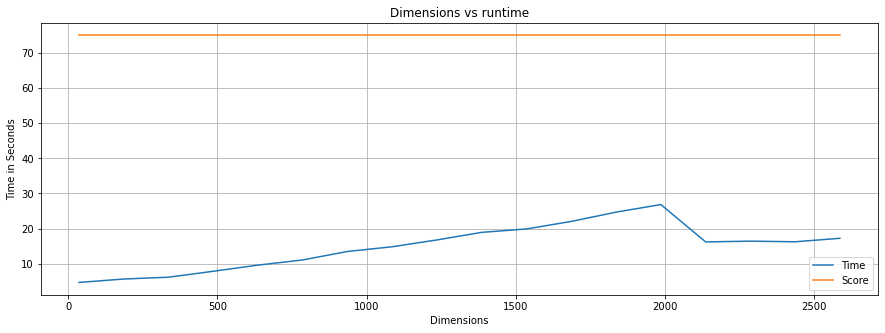

In [12]:
plt.figure(figsize = (15,5))
plt.plot(dimensions, timings, label = "Time")
plt.plot(dimensions, scores_logreg, label = "Score")
plt.title("Dimensions vs runtime")
plt.ylabel("Time in Seconds")
plt.xlabel("Dimensions")
plt.grid()
plt.legend()
plt.xticks()
plt.show()

As you can see, the more dimensions we use, the more time it will time it takes for it to perform its fitting and scoring (until an unusual drop and plateau). run time and # of dimensions have a positive linear (mostly) relationship. However, if we ever wanted to know the specific nature of the relationship, we would be out of luck, as PCA combines the feautres of our table, thus losing the meaning of it in the process. 

## 2. Employ a K-Nearest Neighbour classifier on this dataset

K Nearest Neighbour goes through datapoint by datapoint, looking at its surroundings and classiffying based off of that.  

In [13]:
from sklearn.neighbors import KNeighborsClassifier

#Instantiate (thankfuly data is already scaled)
knn = KNeighborsClassifier(n_neighbors = 300, weights='distance')

#Fit
knn.fit(X_train, y_train)

#Score
print(f"The KNN score is: {round(knn.score(X_test, y_test)*100,2)}%")

The KNN score is: 62.0%


We get a pretty average score, and it took a minute to get it. How about we reduce the number of datapoints we work with? 

In [14]:
timings_knn = []
scores = []
observations = range(150,coefs_size,100)

#Grabbing a min-max scaler
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

for N in observations:
    #Time sandwich
    start_time = time.time()
    
    #Varying the number of observations
    train_sample = train.sample(n = N)
    X_train_sample = train_sample.iloc[:,0:2586]
    y_train_sample = train_sample['Reviewer_Score']
    
    #Scaling
    X_train_sample_scaled = mmscaler.fit_transform(X_train_sample)
    X_test_sample_scaled = mmscaler.transform(X_test)
    
    #Instantiate
    knn = KNeighborsClassifier(n_neighbors = 150)

    #Fit on scaled training data
    knn.fit(X_train_sample_scaled, y_train_sample)

    #Score on test data
    scores.append(knn.score(X_test_sample_scaled, y_test))
    
    #End of time sandwich
    timings_knn.append(time.time()-start_time)
    
    #Look at progress
    print(N, end = "\r")
    

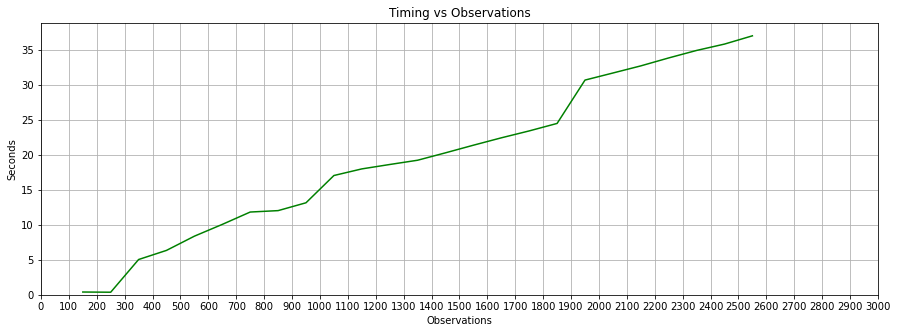

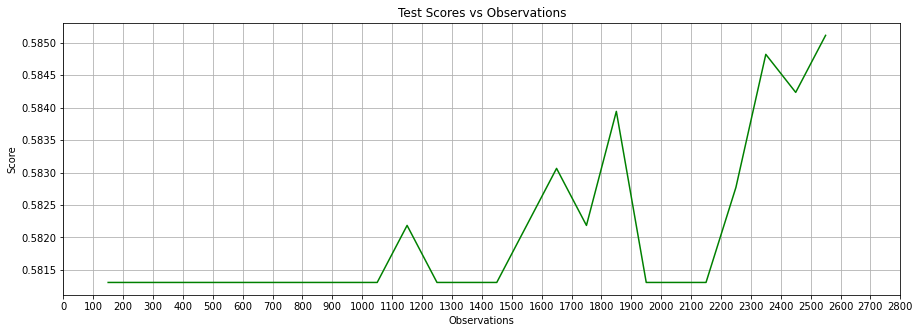

In [15]:
#Plotting the timings
plt.figure(figsize = (15,5))
plt.plot(observations, timings_knn, label = "Timing", c = "green")
plt.grid()
plt.xlabel("Observations")
plt.ylabel("Seconds")
plt.title("Timing vs Observations")
plt.xticks(range(0,3100,100))
plt.ylim(0)
plt.show()

#Plotting the scores
plt.figure(figsize = (15,5))
plt.plot(observations, scores, label = "Scores", c = "green")
plt.grid()
plt.ylabel("Score")
plt.xlabel("Observations")
plt.title("Test Scores vs Observations")
plt.xticks(range(0,2900,100))
plt.show()

As you can see, while the computation time drops when we reduce the number of  observations, our model becomes less reliable as a consequence. Of course we could throw computation power or optimize our processess, but this isn't always a viable option for many.

One thing we can do to imporove the model is optimize its hyperparameter `n_neighbors`. In order to perform hyperparameter optimization, we have to split our data into training and validation sets. 

In [16]:
from sklearn.model_selection import train_test_split

#Train Test Split (Done for us)
'''
X_train_scaled
y_train

X_test_scaled
y_test
'''

#Validation split
X_train, X_validation, y_train, y_validation = train_test_split(X_train_scaled,
                                                                y_train,
                                                                test_size=0.3)

In [18]:
neighbors = range(10,1200, 100)

train_scores_knn = []
validation_scores_knn = []

for k in neighbors:
     #Instantiate
    knn = KNeighborsClassifier(n_neighbors = k)

    #Fit on scaled training data
    knn.fit(X_train, y_train)

    #Score on test data
    train_scores_knn.append(knn.score(X_train, y_train))
    validation_scores_knn.append(knn.score(X_test, y_test))
    
    print(k, end = "\r")

KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.plot(neighbors,train_scores_knn, label = "Training Score")
plt.plot(neighbors,validation_scores_knn, label = "Validation Score")
plt.grid()
plt.legend()
plt.show()

Now while this does yeild a great result, one thing we should always remember is that we should NOT scale our data until after we split it, in fact we should not do ANYTHING to the testing data at all until it is split away from the training data. 

One reason is that it "leaks" information about the data. For example, say we are using our MinMaxScaler. What happens if we apply it, and then the maximum value is left behind in the training set? It was scaled along side the training data, and by using it had influence from that maximum or minimum value in that set. New data will never have this information because it is *new* data that will never see that training data. Doing scaling before splitting is bad practice. 

## 3. Employ a Decision Tree classifier on this dataset:

In [19]:
from sklearn.tree import DecisionTreeClassifier

#Instantiate
dt = DecisionTreeClassifier()

#Fit
dt.fit(X_train, y_train)

#Score
print(f"The Decision Tree score is: {round(dt.score(X_test, y_test)*100,2)}%")

The Decision Tree score is: 58.07%


In [20]:
depths = range(1,20,1)
dt_train_scores = []
dt_val_scores = []

for d in depths:
    
    #Instantiate
    dt = DecisionTreeClassifier(max_depth = d)

    #Fit
    dt.fit(X_train, y_train)

    #Score
    dt_val_scores.append(dt.score(X_validation, y_validation))
    dt_train_scores.append(dt.score(X_train, y_train))
    
    print(d, end = "\r")

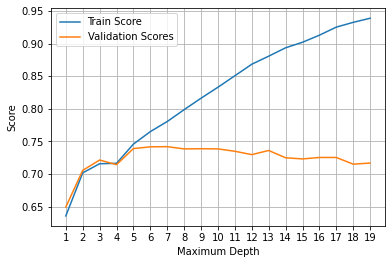

In [21]:
plt.figure()
plt.plot(depths, dt_train_scores, label = "Train Score")
plt.plot(depths, dt_val_scores, label = "Validation Scores")
plt.legend()
plt.ylabel("Score")
plt.xlabel("Maximum Depth")
plt.xticks(depths)
plt.grid()
plt.show()

Judging from the graph above, it seems that the optimal value would be somewhere between 3 and 6, a point where the training data is not overfitted and the results are still fairly high. Let's test out the value `5` on our test data now that we have optimzd it: 


In [41]:
#Instantiate
dt = DecisionTreeClassifier(max_depth = 5) #inputting our optimzed value

#Fit
dt.fit(X_train, y_train)

#Score
print(round(dt.score(X_test, y_test)*100,2),"%")

74.77 %


Not bad, better than some of the other models we implemented, however the real strength of decision trees lies within interpretability. 

* On smaller trees (depths <= 5) one can acutally see and understand the logic (even those without a datascience background). Interpreting the model is a breeze!
* The decision trees run faster than a KNN model. 

let me demonstrate both by performing a quick samplt decision tree:

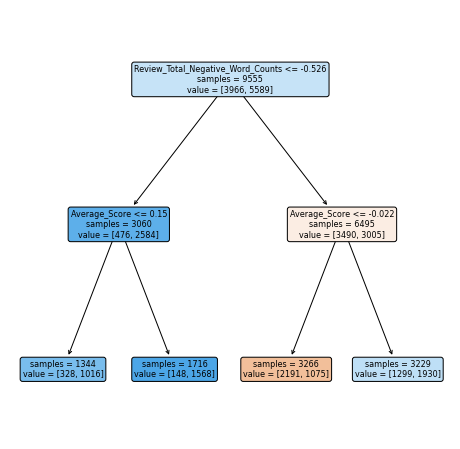

In [23]:
from sklearn.tree import plot_tree


#Instantiate
dt = DecisionTreeClassifier(max_depth = 2) #inputting our optimzed value

#Fit
dt.fit(X_train, y_train)

#Score
dt.score(X_test, y_test)

plt.figure(figsize = (8,8))
plot_tree(dt, feature_names = train.columns,
          rounded=True,
          fontsize = 8,
          impurity=False,
          filled=True);

However, they do have their own downsides to contend with: 

* It can be very easy to overfit to the data. 
* Decision trees may not always be as accurate as KNN. 

It's a bit of a trade of between accuracy and understanding. 

But you may be wondering, why even bother with the validation set? Why not simply use the test set? Well, this is because we want to be VERY sure that we aren't fitting to the training data. We are going to come in contact with data we don't know about, and if we start fitting to our training data (which we are supposed to have NEVER seen before) and start getting overconfident, this could reduce the quality of our model when we do come into contact with new data. 

By splitting it by validation first, we can train it and optimize it, and then do little tests with our validation set to see what the best course of action to take is. Once we get a good score on our train and validation, only then can we truly test it with "new" data and give it a run with our test data to get an objective measure of our models performance.

## Re-run a decision tree or logistic regression on the data again:

Consider this, you got lucky. You split into your train, test and validation set and your getting a good score, even a great score from your validation and training set. You go to try it on your test set and are met with a terrible score. What could you have done differently? How about 5 fold cross validation? 

In [24]:
from sklearn.model_selection import cross_val_score

C_value = []

for i in range(-10,5,1):
    C_value.append(10**i)

In [25]:
cv_scores = []

for c in C_value:
    
    #Instantiate
    logreg = LogisticRegression(C = c, random_state = 20)
    
    #Fitting and scoring (at the same time, what a day to be alive!)
    cv_score = np.mean(cross_val_score(logreg,
                                       X_train,
                                       y_train,
                                       cv = 5))
    cv_scores.append(cv_score)
    
    print(c, end = "\r")

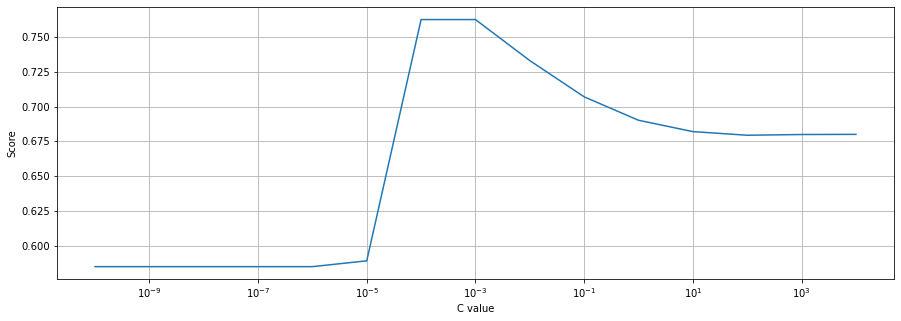

In [26]:
plt.figure(figsize = (15,5))
plt.plot(C_value, cv_scores)
plt.grid()
plt.xlabel("C value")
plt.ylabel("Score")
plt.xscale("log")
plt.show()

Judging from the graph, a C value above, a C value that's larger than 0.0001 results in a higher score. 

In [27]:
#Instantiate
logreg = LogisticRegression(C = 0.1)

#Fit
logreg.fit(X_train, y_train)

#Score
print(f"{round(logreg.score(X_test, y_test)*100,2)}%")

59.27%


We can take a detailed look at the best model by employing a confusion matrix:

|     |  Model Says False  |   Model Says True  | 
| --------- |:---:|:---:|
|Is Actually False|*Actually False* | *Not Actually True* | 
|Is Actually True|*Not Actually False* |*Actually True* | 

or 

|     |  Predicted Class 0  |   Predicted Class 1  | 
| --------- |:---:|:---:|
|True Class 0|**TN** | **FP** | 
|True Class 1|**FN** |**TP** | 

In [28]:
from sklearn.metrics import confusion_matrix

y_predicted = logreg.predict(X_test)

pd.DataFrame(confusion_matrix(y_test, y_predicted))

,0,1
0,115,1314
1,76,1908


Judging from this, the model is actually doing quite well. The only problem is, it is having quite a hard time discerning what a negative is. It incorrectly labels a signifigant amount of negative classes as positive! 

### Adding a feature
One feature I beleive would be helpful would be the temperature during the month that the customers were staying. If the customer stayed during a time where it rained quite a bit and the weather was less than favorable, then they might not enjoy it as much as a sunnier month. 

While I initally tried to use an api to exchange the lattitude and longitude for the country, I found a website called [GPS point plotter](https://gpspointplotter.com/) and found that all of these hotels are in the south UK, and not all of europe (thankfully). With this, I can very easily use the "month" column to add a binary row of "Tropical weather?" But before that can happen, when does tropical weather occur in London?

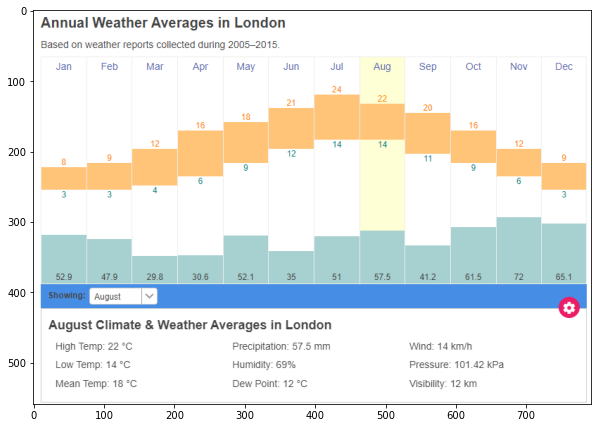

In [29]:
img = mpimg.imread('data/london climate.png')

plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()

It appears that April-September (4-9) is what is considered "Tropical" in London. Let's create the feature and append it to the dataframe: 

In [30]:
#Defining the tropical months
tropical_months = [4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

#Making a column of wether or not the month was tropical
tropical_list = []
for i in train['Review_Month']:
    if i in tropical_months:
        tropical_list.append(1)
    else:
        tropical_list.append(0)

#Converting it to ta dataframe
tropical_list = pd.DataFrame(tropical_list)

#Inserting it into the train dataframe
train.insert(2586, "Tropical Weather", tropical_list, allow_duplicates=False)
train.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,Tropical Weather,Reviewer_Score
0,220.0,9.1,20.0,902.0,21.0,1.0,275.0,51.494308,-0.175558,11.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,1.0
1,1190.0,7.5,5.0,5180.0,23.0,6.0,481.0,51.514879,-0.160650,4.0,...,0.0,0.0,0.0,0.0,0.425849,0.0,0.0,0.0,1,1.0
2,299.0,8.3,81.0,1361.0,27.0,4.0,672.0,51.521009,-0.123097,10.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0
3,87.0,9.0,17.0,355.0,13.0,7.0,412.0,51.499749,-0.161524,6.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1,1.0
4,317.0,7.6,14.0,1458.0,0.0,1.0,499.0,51.516114,-0.174952,3.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0


In [31]:
#Repeating for the test dataset
tropical_list = []
for i in test['Review_Month']:
    if i in tropical_months:
        tropical_list.append(1)
    else:
        tropical_list.append(0)

#Converting it to ta dataframe
tropical_list = pd.DataFrame(tropical_list)

#Inserting it into the train dataframe
test.insert(2586, "Tropical Weather", tropical_list, allow_duplicates=False)
test.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,Tropical Weather,Reviewer_Score
0,2288.0,8.1,24.0,9568.0,16.0,1.0,527.0,51.511099,-0.120867,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,61.0,9.0,0.0,263.0,21.0,1.0,527.0,51.522636,-0.160287,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
2,974.0,9.0,20.0,3040.0,20.0,12.0,485.0,51.500732,-0.016550,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
3,838.0,8.4,23.0,3274.0,29.0,5.0,415.0,51.495666,-0.145279,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
4,879.0,8.8,48.0,2768.0,51.0,1.0,385.0,51.508354,0.019886,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0


In [32]:
X_train = train.iloc[:, 0:2587]
y_train = train['Reviewer_Score']

X_test = test.iloc[:, 0:2587]
y_test = test['Reviewer_Score']

Now that we have successfully added the feature, we can re-run the logistic regression:

In [37]:
C_value = []

for i in range(-5,5,1):
    C_value.append(10**i)

In [38]:

cv_scores = []

for c in C_value:
    
    #Instantiate
    logreg = LogisticRegression(C = c)
    
    #Fitting and scoring (at the same time, what a day to be alive!)
    cv_score = np.mean(cross_val_score(logreg,
                                       X_train,
                                       y_train,
                                       cv = 5))
    cv_scores.append(cv_score)
    
    print(c, end = "\r")

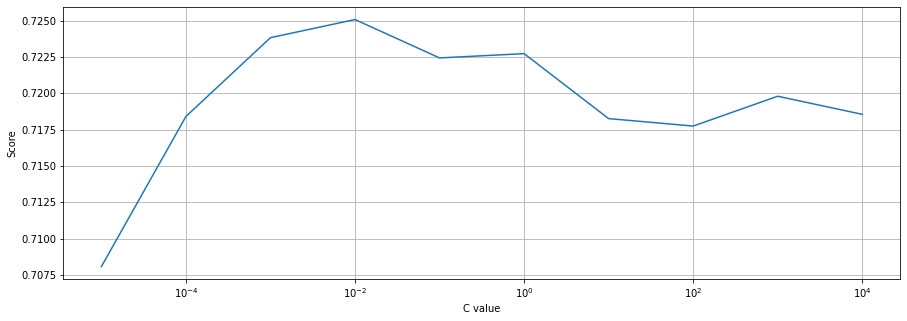

In [39]:
plt.figure(figsize = (15,5))
plt.plot(C_value, cv_scores)
plt.grid()
plt.xlabel("C value")
plt.ylabel("Score")
plt.xscale("log")
plt.show()

In [40]:
logreg = LogisticRegression(C = 0.001)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.7286645666984104

Now this is *slightly* better than the original score, however it doesn't seem to be statistically signifigant given that its still within less than a 1% margin of the last model. This doesn't mean it isn't completly useless however, and it could be imporoved further given more data, perhaps instead of "Tropical Weather", one could analyze the day, month year combinations and see if it rained in london that day (which could dampen the mood of a vacation considerably).  